In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter

In [3]:
restauran_data = pd.read_csv("European Restaurant Reviews.csv", header=None)

In [4]:
idx = 0
restauran_data.insert(idx, 'index', value=range(len(restauran_data)))

In [5]:
restauran_data.columns = ["index", "country", "restaurant_name", "review_sentiment", "review_date", "review_title", "review_text"]

In [6]:
restauran_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   index             1503 non-null   int64 
 1   country           1503 non-null   object
 2   restaurant_name   1503 non-null   object
 3   review_sentiment  1503 non-null   object
 4   review_date       1503 non-null   object
 5   review_title      1503 non-null   object
 6   review_text       1503 non-null   object
dtypes: int64(1), object(6)
memory usage: 82.3+ KB


In [7]:
restauran_data.restaurant_name.nunique()

8

In [8]:
with open("European Restaurant Reviews.csv", "r", encoding='utf-8') as yuhuu:
    print(yuhuu.read()[65:200])


France,The Frog at Bercy Village,Negative,Rude manager,May 2024 •,The manager became agressive when I said the carbonara was not good.


In [9]:
restauran_data.review_text.str.len().sort_values(ascending=False)

103    3679
28     3555
67     3516
99     3106
102    3087
       ... 
537      71
145      71
120      71
184      10
0         6
Name: review_text, Length: 1503, dtype: int64

In [10]:
restauran_data.review_text.str.len().mean()

366.19827012641383

In [11]:
restauran_data.review_text.str.len().median()

235.0

In [12]:
for sentiment, group_data in restauran_data.groupby("review_sentiment"):
    print(sentiment, group_data.review_text.str.len().median())

Negative 517.0
Positive 214.0
Sentiment 6.0


In [13]:
restauran_data.loc[1].review_text

'The manager became agressive when I said the carbonara was not good. She was rude. It was  a very bad experience. The worst in Rome in many years.'

In [14]:
Counter(restauran_data.loc[1].review_text)

Counter({' ': 28,
         'e': 18,
         'a': 15,
         'r': 9,
         'n': 8,
         's': 8,
         'o': 6,
         'h': 5,
         'i': 5,
         'w': 5,
         'm': 4,
         'd': 4,
         't': 4,
         '.': 4,
         'g': 3,
         'b': 3,
         'c': 3,
         'y': 3,
         'T': 2,
         'v': 2,
         'I': 2,
         'S': 1,
         'u': 1,
         'x': 1,
         'p': 1,
         'R': 1})

In [15]:
all_rows = " ".join(restauran_data.review_text.ravel())

In [16]:
frequences = Counter(all_rows.lower()).most_common(28)

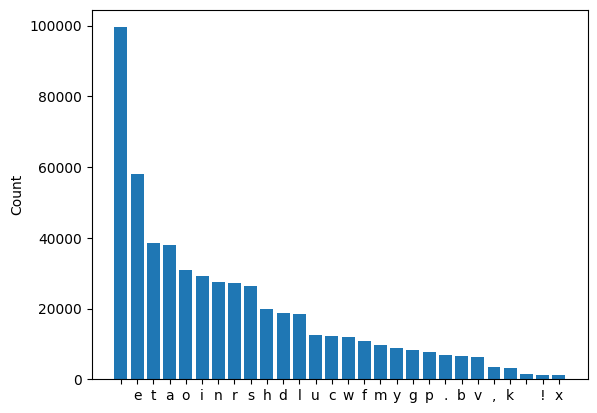

In [17]:
plt.bar([symbol for symbol, frequency in frequences], [frequency for symbol, frequency in frequences])
plt.ylabel("Count")
plt.show()

In [18]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
stop = set(stopwords.words("english"))
sentence = "this is a foo bar sentence"
print([w for w in sentence.lower().split() if w not in stop])

['foo', 'bar', 'sentence']


In [20]:
hsk = pd.read_csv("hsk5.txt", header=None)

In [21]:
ch_text = pd.read_csv("chinese_economic_text.txt", header=None)

In [22]:
with open("chinese_economic_text.txt", "r", encoding='utf-8') as target:
    target_text = target.read()

In [23]:
with open("hsk5.txt", "r", encoding='utf-8') as yuhuu:
    words = yuhuu.read()
    count = 0
    for i in range(len(words)):
        if words[i] in target_text:
            count += 1
print(count)

18150


In [24]:
print(stop)

{"you're", 'been', "don't", 's', "they've", "weren't", 'hasn', "it's", 'didn', 'mightn', 'off', "haven't", "we'd", 'was', 'while', 'being', 'wasn', "you'll", 'aren', 'can', 'o', 'whom', 'not', "you'd", 'down', 'be', 'from', 'its', 'she', 'myself', 'then', 'during', 'had', 'doesn', 'yourselves', 'all', 'nor', "should've", 'where', 'haven', 'so', 'this', 'but', 'y', "she'd", 'under', 'because', "he's", 'on', 'what', 'did', 'more', "we've", 'that', 'am', 'or', 'against', 'is', 'there', 'as', 'we', 'very', 'only', "didn't", "mightn't", 'isn', "couldn't", 'an', 'weren', "we're", 'few', 'don', 'before', 'm', 'now', 'couldn', 'do', 'hadn', 'our', 'needn', 'ma', 'having', 'it', 'between', 'him', 'such', "shan't", "they're", 'those', "won't", 'no', "doesn't", "you've", 'over', 'theirs', 'should', 'up', 'her', 'for', 'hers', 'you', 'a', 'doing', "shouldn't", "wasn't", 'about', "it'd", "isn't", 'themselves', 'i', 'has', 'each', "i'm", 'until', 'any', 'when', 'yourself', 'below', 'itself', 'these'

In [25]:
restauran_data.review_text.apply(lambda text: text.split(" "))

0                                                [Review]
1       [The, manager, became, agressive, when, I, sai...
2       [I, ordered, a, beef, fillet, ask, to, be, don...
3       [This, is, an, attractive, venue, with, welcom...
4       [Sadly, I, , used, the, high, TripAdvisor, rat...
                              ...                        
1498    [Despite, the, other, reviews, saying, that, t...
1499    [beer, is, good., , food, is, awfull, , The, o...
1500    [for, terrible, service, of, a, truly, comedic...
1501    [We, visited, the, Havana's, Club, Museum, whi...
1502    [Food, and, service, was, awful., Very, pretty...
Name: review_text, Length: 1503, dtype: object

In [26]:
restauran_data.review_text.str.split("\\s+")

0                                                [Review]
1       [The, manager, became, agressive, when, I, sai...
2       [I, ordered, a, beef, fillet, ask, to, be, don...
3       [This, is, an, attractive, venue, with, welcom...
4       [Sadly, I, used, the, high, TripAdvisor, ratin...
                              ...                        
1498    [Despite, the, other, reviews, saying, that, t...
1499    [beer, is, good., food, is, awfull, The, only,...
1500    [for, terrible, service, of, a, truly, comedic...
1501    [We, visited, the, Havana's, Club, Museum, whi...
1502    [Food, and, service, was, awful., Very, pretty...
Name: review_text, Length: 1503, dtype: object

In [27]:
restauran_data.review_text.str.split("\\s+").apply(lambda x: len(x)).sort_values(ascending=False)

67     646
28     641
103    628
102    572
99     550
      ... 
492     13
145     13
120     13
184      2
0        1
Name: review_text, Length: 1503, dtype: int64

In [28]:
restauran_data[restauran_data.review_text.str.contains("happy", case=False)].review_sentiment.value_counts()

review_sentiment
Positive    59
Negative     4
Name: count, dtype: int64

In [32]:
words_lower = restauran_data.review_text.str.split("\\s+").apply(lambda words: [w.lower() for w in words])

In [35]:
words_lower = words_lower.apply(lambda words: [w for w in words if not w in stopwords.words("english")])

In [36]:
words_lower

0                                                [review]
1       [manager, became, agressive, said, carbonara, ...
2       [ordered, beef, fillet, ask, done, medium,, go...
3       [attractive, venue, welcoming,, albeit, somewh...
4       [sadly, used, high, tripadvisor, rating, liter...
                              ...                        
1498    [despite, reviews, saying, 'lovely, place, han...
1499    [beer, good., food, awfull, decent, thing, shi...
1500    [terrible, service, truly, comedic, level,, 2/...
1501    [visited, havana's, club, museum, located, old...
1502    [food, service, awful., pretty, stop., good, p...
Name: review_text, Length: 1503, dtype: object

In [37]:
from nltk.stem import PorterStemmer

In [41]:
words_in_line = words_lower.loc[55]
stemmer = PorterStemmer()

In [44]:
words_lower = words_lower.apply(lambda words: [stemmer.stem(w) for w in words])

In [45]:
words_lower.apply(Counter)

0                                           {'review': 1}
1       {'manag': 1, 'becam': 1, 'agress': 1, 'said': ...
2       {'order': 1, 'beef': 1, 'fillet': 1, 'ask': 2,...
3       {'attract': 1, 'venu': 1, 'welcoming,': 1, 'al...
4       {'sadli': 1, 'use': 1, 'high': 1, 'tripadvisor...
                              ...                        
1498    {'despit': 2, 'review': 1, 'say': 1, ''love': ...
1499    {'beer': 1, 'good.': 1, 'food': 2, 'awful': 1,...
1500    {'terribl': 1, 'servic': 1, 'truli': 1, 'comed...
1501    {'visit': 1, 'havana'': 1, 'club': 1, 'museum'...
1502    {'food': 1, 'servic': 1, 'awful.': 1, 'pretti'...
Name: review_text, Length: 1503, dtype: object

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [47]:
c_vectorizer = CountVectorizer()
c_vectorizer.fit(restauran_data.review_text)

CountVectorizer()

In [48]:
c_vectorizer.vocabulary_

{'review': 4627,
 'the': 5554,
 'manager': 3360,
 'became': 654,
 'agressive': 252,
 'when': 6114,
 'said': 4739,
 'carbonara': 987,
 'was': 6061,
 'not': 3715,
 'good': 2524,
 'she': 4937,
 'rude': 4710,
 'it': 2983,
 'very': 5968,
 'bad': 593,
 'experience': 2102,
 'worst': 6196,
 'in': 2859,
 'rome': 4683,
 'many': 3374,
 'years': 6227,
 'ordered': 3838,
 'beef': 661,
 'fillet': 2234,
 'ask': 487,
 'to': 5628,
 'be': 644,
 'done': 1790,
 'medium': 3438,
 'got': 2534,
 'well': 6099,
 'cooked': 1396,
 'and': 350,
 'dry': 1838,
 'told': 5636,
 'them': 5559,
 'they': 5571,
 'took': 5648,
 'steak': 5280,
 'after': 236,
 '20': 48,
 'minutes': 3513,
 'brought': 870,
 'me': 3422,
 'another': 368,
 'that': 5552,
 'completely': 1306,
 'rare': 4414,
 'left': 3183,
 'all': 287,
 'asked': 488,
 'about': 139,
 'but': 922,
 'charged': 1090,
 'fool': 2325,
 'price': 4251,
 'this': 5580,
 'is': 2974,
 'an': 346,
 'attractive': 542,
 'venue': 5958,
 'with': 6160,
 'welcoming': 6097,
 'albeit': 267,
 

In [50]:
vectors = c_vectorizer.transform(restauran_data.review_text)

In [51]:
model = MultinomialNB()

In [52]:
model.fit(vectors, restauran_data.review_sentiment)

MultinomialNB()